In [1]:
import requests
import json
import os


url = 'http://0.0.0.0:9090/feature_extraction/face'

features = []

root_path = '/upload/xmyc/picture/2021-11/'

fpaths = os.listdir(root_path)
fpaths.sort()
fpaths = fpaths[:5000]
# print(fpaths)

final_paths = []

for i, fpath in enumerate(fpaths):
    if "crop" in fpath or "png" in fpath:
        continue
    data = {
        "pictureId":i,
        "screenshot": root_path + fpath,
        "isSource": 1,
    }

    data = json.dumps(data)

    r = requests.post(url, data)
    # print(r.text)
    feature = json.loads(r.text)
    is_save = feature["message"]["is_save"]
    feature = feature["message"]["feature"]

    if is_save == 0:
#         print(root_path + fpath)
        final_paths.append(fpath)
        features.append(feature)

print(len(features))

# exit()

# data = {
#     "pictureId":21,
#     "screenshot":'/upload/xmyc/picture/2021-11/76e72cfa-5f07-4811-a739-613164f3f7f0.png'
# }

# data = json.dumps(data)
# r = requests.post(url, data)
# print(r.text)


125


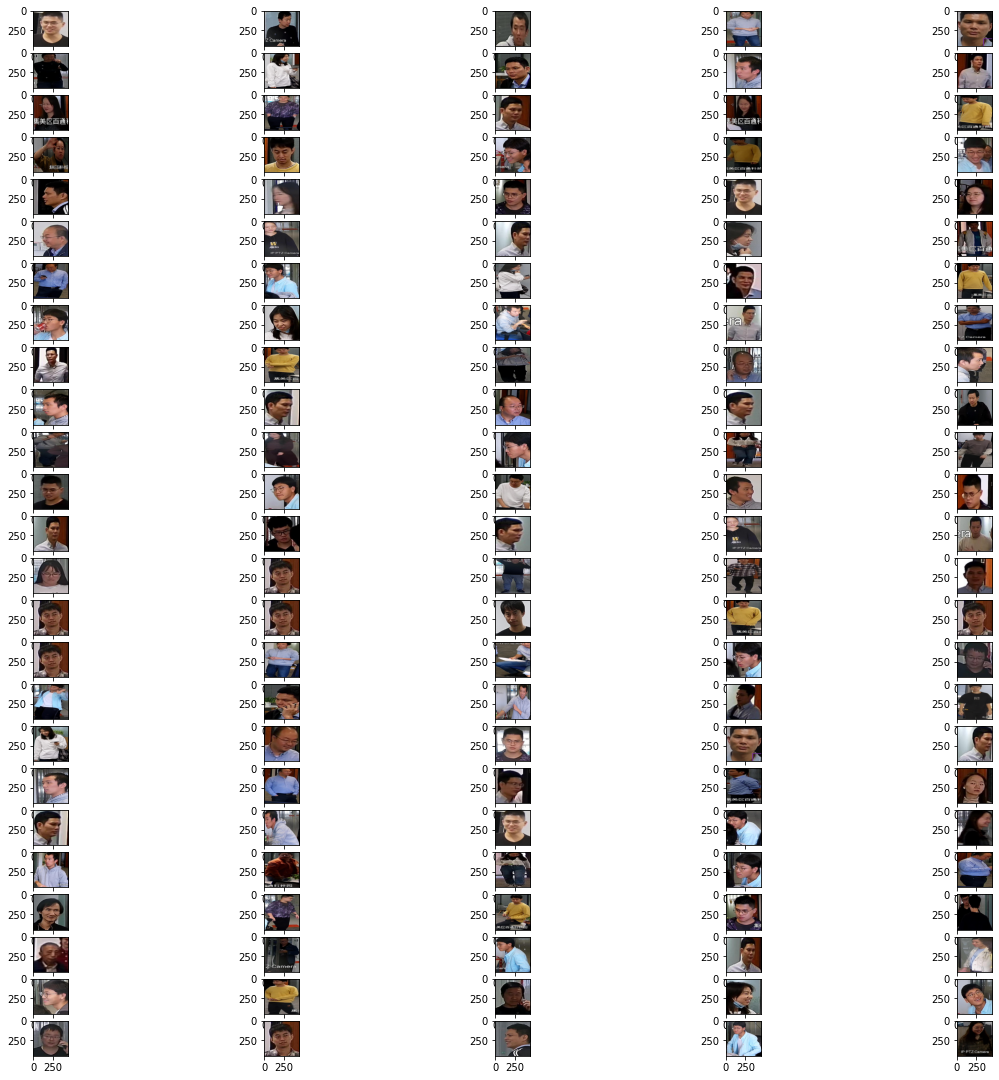

In [4]:
import matplotlib.pyplot as plt
import tqdm
from PIL import Image

plt.figure(figsize=(20,20))

for i, path in enumerate(final_paths):
    if "png" in path:
        continue
    plt.subplot(26, 5, i+1)
    img = Image.open(root_path + path)
    img = img.resize((448, 448), Image.BILINEAR)
    plt.imshow(img)



In [ ]:

feature = features.pop(3)
print(final_paths.pop(3))

url = 'http://0.0.0.0:9090/feature_comparison'
data = {
        "feature": feature,
        "baseFeatures":[
            {
                "pictureId": i,
                "feature": features[i]
            } for i in range(len(features))
        ]
    }
data = json.dumps(data)

plt.figure(figsize=(20,20))

r = requests.post(url, data)
print(r.text)
r = json.loads(r.text)
for msg in r["message"]:
    if msg["matched"] != "0%":
        print(msg["matched"])
        print(final_paths[msg["pictureId"]])
        
        plt.subplot(22, 5, i+1)
        
